# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [3]:
import pandas as pd

## imports for Python, Pandas

In [6]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [7]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [8]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [9]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [10]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

# Problem # 1: Find the 10 countries with most projects


In [18]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [19]:
# load Jason dataset into python Environment: world_bank
world_bank=pd.read_json('data/world_bank_projects.json')

In [20]:
# Display top 5 records of world_bank dataframe
world_bank.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [21]:
# print columns 
print(world_bank.columns)

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')


In [22]:
# print index
print(world_bank.index)

RangeIndex(start=0, stop=500, step=1)


In [23]:
# Dimensions of Dataframe
world_bank.shape


(500, 50)

In [24]:
# Number of rows
world_bank.shape[0]

500

In [25]:
# Number of columns
world_bank.shape[1]

50

In [26]:
# Find data type of columns(Method 1)
world_bank.dtypes


_id                         object
approvalfy                   int64
board_approval_month        object
boardapprovaldate           object
borrower                    object
closingdate                 object
country_namecode            object
countrycode                 object
countryname                 object
countryshortname            object
docty                       object
envassesmentcategorycode    object
grantamt                     int64
ibrdcommamt                  int64
id                          object
idacommamt                   int64
impagency                   object
lendinginstr                object
lendinginstrtype            object
lendprojectcost              int64
majorsector_percent         object
mjsector_namecode           object
mjtheme                     object
mjtheme_namecode            object
mjthemecode                 object
prodline                    object
prodlinetext                object
productlinetype             object
project_abstract    

In [27]:
# Find data types of columns (Method 2)
world_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

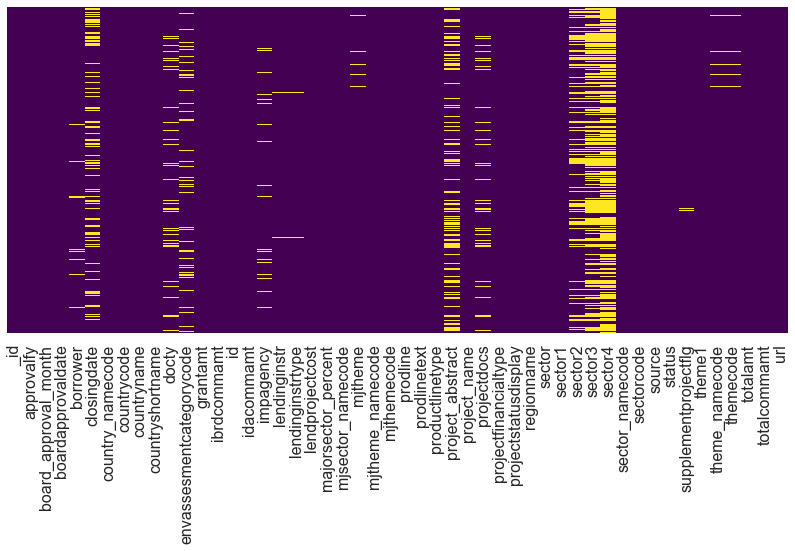

In [33]:
# Visualization of missing data :Create heatmap of entire data frame to show columns with missing data
# Yellow lines in the plot indicates missing data 
plt.figure(figsize=(14,6))
sns.set_context('poster',font_scale=1)
sns.heatmap(world_bank.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [ ]:
# Column "Countryname" has no missing values

In [34]:
# Frequency of values in Countryname column (Descending Order: Highest to lowest)
world_bank['countryname'].value_counts()

Republic of Indonesia                       19
People's Republic of China                  19
Socialist Republic of Vietnam               17
Republic of India                           16
Republic of Yemen                           13
People's Republic of Bangladesh             12
Nepal                                       12
Kingdom of Morocco                          12
Republic of Mozambique                      11
Africa                                      11
Islamic Republic of Pakistan                 9
Federative Republic of Brazil                9
Burkina Faso                                 9
United Republic of Tanzania                  8
Republic of Armenia                          8
Republic of Tajikistan                       8
Lao People's Democratic Republic             7
Kyrgyz Republic                              7
Hashemite Kingdom of Jordan                  7
Federal Republic of Nigeria                  7
Republic of Kenya                            6
Democratic Re

In [36]:
# Solution 1
# Display top 10 countries with most projects ( highest to lowest)
world_bank['countryname'].value_counts().head(10)

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Nepal                              12
Kingdom of Morocco                 12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64

In [44]:
top10_countries=world_bank['countryname'].value_counts().head(10)

In [54]:
type(top10_countries)

pandas.core.series.Series

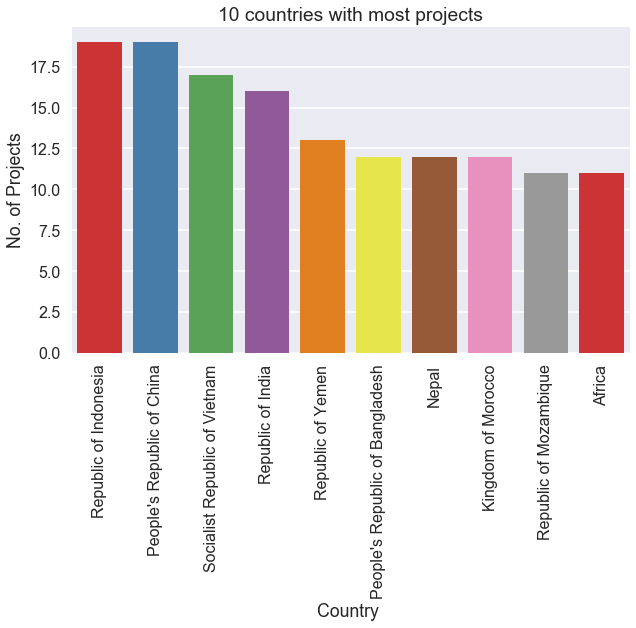

In [96]:
#sns.barplot(x=df.reputation.value_counts().index, y=df.reputation.value_counts())
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
ax=sns.barplot(x=world_bank.countryname.value_counts().index[:10],y=world_bank.countryname.value_counts()[:10],ci=None,palette='Set1')
ax.set_xticklabels(world_bank.countryname.value_counts().index[:10],rotation=90)

ax.set_ylabel('No. of Projects')
ax.set_xlabel('Country ')
ax.set_title('10 countries with most projects')
ax.set_yscale('linear')
ax.set_ymargin(1)


#OR for item in ax.get_xticklabels():
   # item.set_rotation(90)



In [97]:
 # Method 2 : solve the problem with groupby method on Countryname column ( sort values in descending order: top 10 records)
world_bank.groupby('countryname').size().sort_values(ascending=False).head(10)

countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
dtype: int64

In [99]:
# Compare above with value_count method 
world_bank.countryname.value_counts().head(10)

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Nepal                              12
Kingdom of Morocco                 12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64

# Problem # 2 : Find the top 10 major project themes (using column 'mjtheme_namecode')

In [156]:
#import libraries
import json

from pandas.io.json import json_normalize


In [157]:
# Use json_normalize function which requires loading json as a string
#load json as string
new_data = json.load((open('data/world_bank_projects.json')))



In [169]:
#use json_normalize function to access nested information
# create Dataframe : df1
df1 = json_normalize(new_data, 'mjtheme_namecode')
# display columns of df1 
df1.columns

Index(['code', 'name'], dtype='object')

In [171]:
# display top 5 records of df1
df1.head() 
#appears that we have missing values in the 'name' column

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [173]:
# Display frequency of values in "name" Column (limit 10 names)
df1.groupby(['name']).size().sort_values(ascending=False).head(10)
# There are some missing values on name column

name
Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
dtype: int64

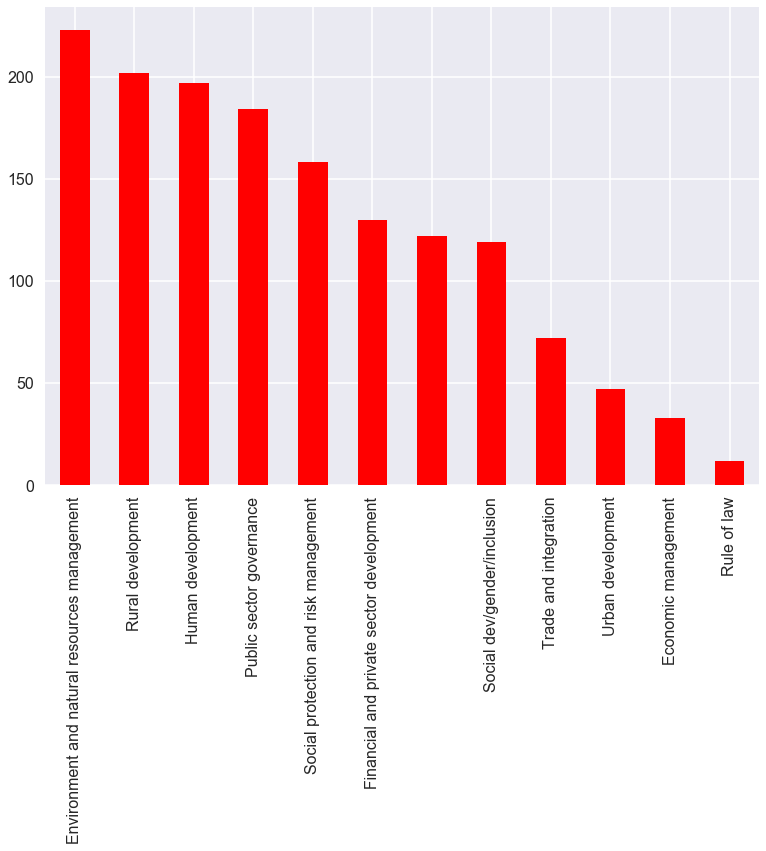

In [188]:
# Missing value representation by value_counts method
df1_by_value_counts=df1['name'].value_counts(dropna=False)
df1_by_value_counts.plot(kind='bar',color='r') # the bar chart shows missing values


In [189]:
#Display frequency of values in "code" Column (limit 10 codes)
df1.groupby(['code']).size().sort_values(ascending=False).head(10)
# No missing values on 'Code' column

code
11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
dtype: int64

In [190]:
# Sort values of code and name column in ascending order to apply backward fill on the missing values : df2

df2 = df1.sort_values(['code', 'name'], ascending=True)

#replacing empty strings with NaN so that we can use fillna()

df2.replace(to_replace='', value=np.nan, inplace=True)

# apply backward fill method on name column 
df2['name'].fillna(inplace=True, method='bfill') #due to the way we sorted earlier, we can 'bfill' with known values
df2.info() #confirm non-null objects
#confirms there are no missing values on df2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1499 entries, 212 to 1495
Data columns (total 2 columns):
code    1499 non-null object
name    1499 non-null object
dtypes: object(2)
memory usage: 35.1+ KB


In [183]:
#Solution 2 : Top 10 major themes
df2.groupby(['code', 'name']).size().sort_values(ascending=False).head(10)

code  name                                        
11    Environment and natural resources management    250
10    Rural development                               216
8     Human development                               210
2     Public sector governance                        199
6     Social protection and risk management           168
4     Financial and private sector development        146
7     Social dev/gender/inclusion                     130
5     Trade and integration                            77
9     Urban development                                50
1     Economic management                              38
dtype: int64

In [184]:
# confirm the codes of df2 are matching with df1
df1.groupby(['code']).size().sort_values(ascending=False).head(10)

code
11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
dtype: int64

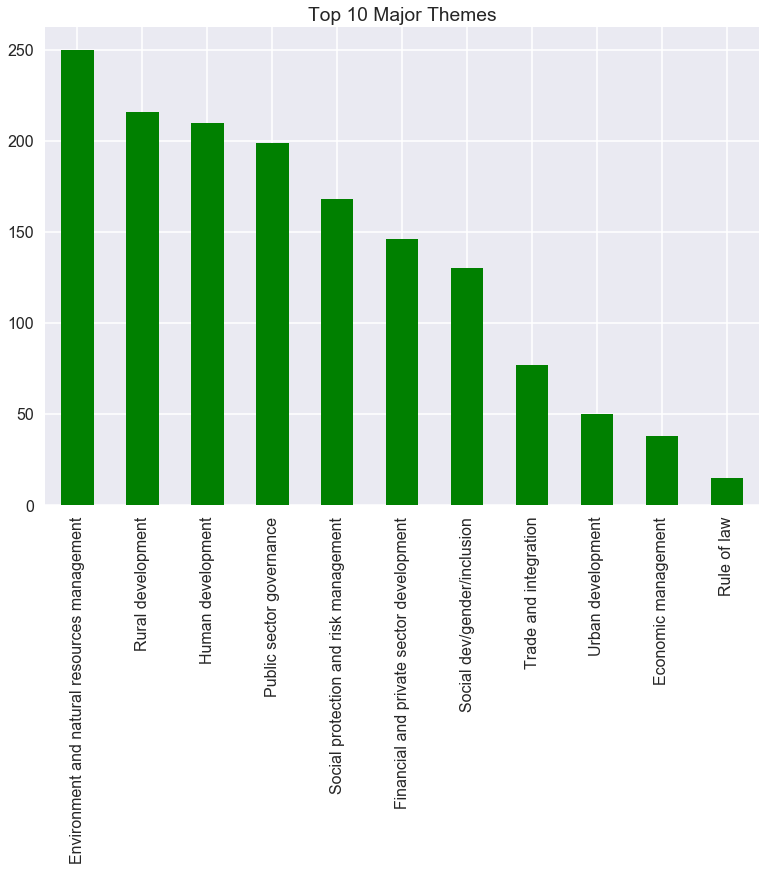

In [208]:
## Bar chart to show there are no missing values in df2
df2_by_value_counts=df2['name'].value_counts(dropna=False)
df2_by_value_counts.plot(kind='bar',color='g') # the bar chart shows there are no missing values

plt.title('Top 10 Major Themes')

#  Problem # 3: In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [193]:
#sort index of df2 
df_sort=df2.sort_index()



In [195]:
# Solution 3 
# Data frame with missing values filled in
df_sort.head(10)

,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion
